In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import math
# 分群 DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

## 讓3d圖可旋轉
%matplotlib notebook
%matplotlib inline

In [74]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(255, 255, 255))
print(rgb_to_hsv(0, 215, 0))

(0, 0.0, 100.0)
(120.0, 100.0, 84.31372549019608)


In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [76]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')
dataset = dataset.sort_values(['商品型號'], ascending=[True])

x1 = dataset.iloc[:,3].values
# x2 = dataset.iloc[:,6].values
# x3 = dataset.iloc[:,9].values
# pa = dataset.iloc[:,4].values

In [77]:
# 處理 主要顏色欄位

rgb_color_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_color_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor1.append(rgb_color_list[i][0])
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor2.append(rgb_color_list[i][1])
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor3.append(rgb_color_list[i][2])
rgb_mcolor3

[55,
 84,
 42,
 38,
 31,
 25,
 18,
 19,
 185,
 223,
 22,
 29,
 82,
 163,
 172,
 73,
 70,
 21,
 48,
 234,
 138,
 174,
 86,
 234,
 29,
 22,
 39,
 39,
 177,
 188,
 174,
 53,
 23,
 36,
 203,
 203,
 170,
 137,
 25,
 43,
 25,
 50,
 42,
 141,
 43,
 158,
 118,
 29,
 43,
 134,
 30,
 19,
 232,
 60,
 252,
 95,
 53,
 28,
 15,
 31,
 47,
 39,
 64,
 37,
 19,
 55,
 206,
 212,
 199,
 202,
 57,
 168,
 55,
 57,
 40,
 19,
 38,
 39,
 64,
 20,
 52,
 237,
 140,
 46,
 29,
 56,
 19,
 165,
 45,
 95,
 45,
 47,
 38,
 46,
 56,
 186,
 172,
 230,
 192,
 116,
 61,
 85,
 45,
 35,
 206,
 56,
 33,
 73,
 69,
 181,
 39,
 69,
 40,
 22,
 93,
 69,
 15,
 32,
 78,
 78,
 77,
 67,
 54,
 48,
 25,
 36,
 163,
 192,
 189,
 25,
 146,
 196,
 35,
 196,
 62,
 17,
 39,
 76,
 68,
 28,
 57,
 184,
 26,
 85,
 17,
 162,
 96,
 76,
 68,
 83,
 11,
 36,
 27,
 9,
 58,
 75,
 54,
 39,
 228,
 39,
 20,
 228,
 97,
 30,
 58,
 21,
 207,
 111,
 210,
 75,
 45,
 77,
 10,
 58,
 75,
 207,
 18,
 57,
 35,
 38,
 41,
 11,
 27,
 169,
 14,
 28,
 37,
 166,
 81,
 71,

In [61]:
dataset.insert(2, "B", rgb_mcolor3)
dataset.insert(2, "G", rgb_mcolor2)
dataset.insert(2, "R", rgb_mcolor1)
dataset

,商品型號,商品網址,R,G,B,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,57,56,55,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,84,83,84,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,43,43,42,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,38,38,38,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,31,30,31,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,210,209,212,LightGray,#d2d1d4,0.704,DimGray,#5d5d64,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,57,57,55,DarkSlateGray,#393937,0.543,DarkGray,#9d9d9e,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,133,123,127,Gray,#857b7f,0.544,WhiteSmoke,#f4f1f2,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,36,36,45,Black,#24242d,0.428,LightGray,#ccd0d5,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [78]:
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_color_list)):
    h, s, v = rgb_to_hsv(rgb_color_list[i][0], rgb_color_list[i][1], rgb_color_list[i][2])
    h = math.cos(h*math.pi/180)
    h = (h+1)/2
    s = s/100
    v = v / 100
    hsv_mcolor1.append(h)
    hsv_mcolor2.append(s)
    hsv_mcolor3.append(v)
hsv_mcolor1

[0.9330127018922199,
 0.75,
 0.75,
 1.0,
 0.75,
 0.41317591116653485,
 0.24999999999999978,
 0.24999999999999978,
 0.9131193871579975,
 0.8665259359149127,
 0.75,
 0.992403876506104,
 0.8830222215594883,
 0.11697777844051027,
 0.03204703662133718,
 0.016447808804744612,
 1.0,
 1.0,
 1.0,
 0.41317591116653485,
 0.022930371799975535,
 0.03320978675139913,
 0.995557639657199,
 0.41317591116653485,
 0.75,
 1.0,
 1.0,
 0.24999999999999978,
 0.75,
 0.16543469682057127,
 0.005253814123502176,
 0.16543469682057077,
 1.0,
 1.0,
 0.75,
 0.75,
 0.023301803972534674,
 0.75,
 0.9330127018922192,
 1.0,
 0.9330127018922192,
 0.9698463103929544,
 0.9330127018922189,
 0.0027390523158632996,
 1.0,
 0.03892861153703342,
 0.06204083721655601,
 0.75,
 1.0,
 0.06698729810778126,
 0.9698463103929542,
 0.9330127018922194,
 0.24999999999999978,
 0.9890738003669028,
 0.2500000000000001,
 0.09549150281252627,
 0.9997451922302986,
 0.9698463103929542,
 0.9504844339512095,
 0.9829629131445341,
 0.06307531146510748

In [79]:
dataset.insert(2, "V", hsv_mcolor3)
dataset.insert(2, "S", hsv_mcolor2)
dataset.insert(2, "H", hsv_mcolor1)
dataset

,商品型號,商品網址,H,S,V,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.933013,0.035088,0.223529,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.750000,0.011905,0.329412,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.750000,0.023256,0.168627,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,1.000000,0.000000,0.149020,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.750000,0.032258,0.121569,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.413176,0.014151,0.831373,LightGray,#d2d1d4,0.704,DimGray,#5d5d64,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.750000,0.035088,0.223529,DarkSlateGray,#393937,0.543,DarkGray,#9d9d9e,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.956773,0.075188,0.521569,Gray,#857b7f,0.544,WhiteSmoke,#f4f1f2,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.200000,0.176471,Black,#24242d,0.428,LightGray,#ccd0d5,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [80]:
# x = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 10]].values
# x = dataset.iloc[:, [2, 3, 4]].values
x = dataset.iloc[:, [2, 3, 4]].values
x

array([[0.9330127 , 0.03508772, 0.22352941],
       [0.75      , 0.01190476, 0.32941176],
       [0.75      , 0.02325581, 0.16862745],
       ...,
       [0.95677273, 0.07518797, 0.52156863],
       [0.25      , 0.2       , 0.17647059],
       [0.5       , 0.00881057, 0.89019608]])

In [105]:
from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in np.arange(4, 100, 1):
    k = k / 1000
    print(k)
    cluster = DBSCAN(eps = k, min_samples = 30)
    cluster.fit(x)
    s = silhouette_score(x, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

0.004
0.005
0.006
0.007
0.008
0.009
0.01
0.011
0.012
0.013
0.014
0.015
0.016
0.017
0.018
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036
0.037
0.038
0.039
0.04
0.041
0.042
0.043
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051
0.052
0.053
0.054
0.055
0.056
0.057
0.058
0.059
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.071
0.072
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.086
0.087
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
K choice: [0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0

In [99]:
db = DBSCAN(eps = 0.12, min_samples = 30).fit(x)
labels = db.labels_

set(labels)

{-1, 0}

<IPython.core.display.Javascript object>


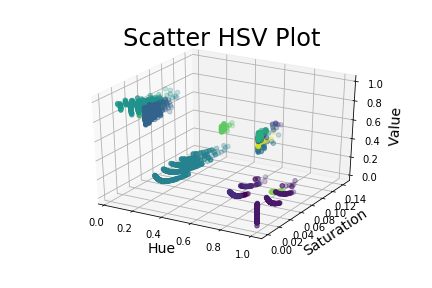

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [53]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 設定標題
ax.set_title('Scatter HSV Plot', fontsize=24) 
# 設定三軸名稱
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)

ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 
for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [54]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [55]:
# import os, shutil
# dp = 'E:/PyETL/color_cluster/DBSCAN/HSV/maj/'
# for i in range(len(labels)):
#     if not os.path.exists(dp + str(labels[i])):
#         os.makedirs(dp + str(labels[i]))
#     path = dp + str(labels[i])
#     shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])


import os, shutil
dp = 'E:/PyETL/color_cluster/DBSCAN/HSV/maj_pa/'
for i in range(len(labels)):
    if not os.path.exists(dp + str(labels[i])):
        os.makedirs(dp + str(labels[i]))
    path = dp + str(labels[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])